In [8]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pickle
from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


In [9]:
folder_path = "D:/Projects/News Article classifier/01 Dataset Creation/Pickles//"

filename = "features_test.pickle"
with open(folder_path + filename, "rb") as file:
    features_test = pickle.load(file)
    
filename = "features_train.pickle"
with open(folder_path + filename, "rb") as file:
    features_train = pickle.load(file)
    
filename = "labels_test.pickle"
with open(folder_path + filename, "rb") as file:
    labels_test = pickle.load(file)

filename = "labels_train.pickle"
with open(folder_path + filename, "rb") as file:
    labels_train = pickle.load(file)
    
filename = "data.pickle"
with open(folder_path + filename, "rb") as file:
    data = pickle.load(file)


# Gradient Boosting Classifier

### 1. Default Model

In [6]:
#Gradient Booosting Classifier
gbc_1 = GradientBoostingClassifier(random_state=29)
gbc_1.fit(features_train, labels_train)
ypred = gbc_1.predict(features_test)
accuracy_score(ypred, labels_test)

0.9443447037701975

### 2. Tuning n_estimators for default learning rate

In [5]:
#For default value of learning rate, finding n_estimators for best results
n_estimators = [100, 500, 1000, 1500, 2000]

param_grid = {"n_estimators" : n_estimators}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 5, test_size = .2, random_state = 48)

grid_gb = GradientBoostingClassifier(random_state=23)
gb_cv1 = RandomizedSearchCV(estimator= grid_gb, 
                           param_distributions= param_grid,
                           n_iter = 400,
                           scoring = "accuracy",
                           cv = 5,
                           verbose = 1,
                           random_state = 48,
                           n_jobs = -1)
gb_cv1.fit(features_train, labels_train)


C:\Users\shail\AppData\Local\Continuum\anaconda3\envs\CS109\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=400. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [6]:
print(
"""Best Score: {0}
Bests Params: {1}
""".format(gb_cv1.best_score_, gb_cv1.best_params_))

best_model = gb_cv1.best_estimator_
best_model.fit(features_train, labels_train)
ypred = best_model.predict(features_test)
print("Training Accuracy: {}".format(accuracy_score(best_model.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(best_model.predict(features_test), labels_test)))

Best Score: 0.9574670478862096
Bests Params: {'n_estimators': 500}

Training Accuracy: 1.0
Test Accuracy: 0.9497307001795332


**Observation** : For default learning rate = 0.1, model performance is best at n_estimators = 500.

I will use this value of n_estimators and tune on tree-specific features.

### 3. Tuning tree-specific features   

#### First run

In [10]:
learning_rate = [0.1]
n_estimators = [500]
max_depth = [None, 3, 6, 9] # 4 options
min_samples_split = [1, 4, 7, 10] # 4 options
min_samples_leaf = [1, 3, 5] #3 options
max_features = [None, 7, 13, 17] #4 options

param_grid = {"n_estimators" : n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split,
              "learning_rate" : learning_rate,
              "min_samples_leaf" : min_samples_leaf}

random_gb = GradientBoostingClassifier(random_state=23)
gb_cv1 = RandomizedSearchCV(estimator= random_gb, 
                           param_distributions= param_grid,
                           n_iter = 150,
                           scoring = "accuracy",
                           cv = 5,
                           verbose = 1,
                           random_state = 48,
                           n_jobs = -1)
gb_cv1.fit(features_train, labels_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 12.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [12]:
print(
"""Best Score: {0}
Bests Params: {1}
""".format(gb_cv1.best_score_, gb_cv1.best_params_))

best_model = gb_cv1.best_estimator_
best_model.fit(features_train, labels_train)
ypred = best_model.predict(features_test)
print("Training Accuracy: {}".format(accuracy_score(best_model.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(best_model.predict(features_test), labels_test)))

Best Score: 0.9718419017820216
Bests Params: {'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 17, 'max_depth': 9, 'learning_rate': 0.1}

Training Accuracy: 1.0
Test Accuracy: 0.9515260323159784


This process is repeated multiple times, tending closer to the optimum parameter values and narrowing the parameter sets at each iteration.

Again, I am not including the complete analysis, with all the runs here, for the neatness of the notebook.

The final run I did for tree specific features is as follows.

In [15]:
learning_rate = [0.1]
n_estimators = [500]
max_depth = [10, 11, 12] # 3 options
min_samples_split = [6] # 1 options
min_samples_leaf = [1] # 1 options
max_features = [13, 14, 15, 16] # 4 options

param_grid = {"n_estimators" : n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split,
              "learning_rate" : learning_rate,
              "min_samples_leaf" : min_samples_leaf}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 5, test_size = .2, random_state = 48)

grid_gb = GradientBoostingClassifier(random_state=23)
gb_cv1 = GridSearchCV(estimator=grid_gb,
                       param_grid = param_grid, 
                       scoring = "accuracy",
                       n_jobs = -1,
                       cv = cv_sets,
                       verbose = 1)
gb_cv1.fit(features_train, labels_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=48, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samp...
                                                  random_state=23,
                                                  subsample=1.0, tol=0.0001,
          

In [16]:
print(
"""Best Score: {0}
Bests Params: {1}
""".format(gb_cv1.best_score_, gb_cv1.best_params_))

best_model = gb_cv1.best_estimator_
best_model.fit(features_train, labels_train)
ypred = best_model.predict(features_test)
print("Training Accuracy: {}".format(accuracy_score(best_model.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(best_model.predict(features_test), labels_test)))

Best Score: 0.9736526946107784
Bests Params: {'learning_rate': 0.1, 'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 500}

Training Accuracy: 1.0
Test Accuracy: 0.9569120287253142


#### 4. Reducing the learning rate and trying higher values of n_estimators

In [23]:
learning_rate = [0.01]
n_estimators = [1000, 3000, 5000, 7000]
max_depth = [11] # 1 options
min_samples_split = [6] # 1 options
min_samples_leaf = [1] # 1 options
max_features = [15] # 4 options
subsample = [1]

param_grid = {"n_estimators" : n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split,
              "learning_rate" : learning_rate,
              "min_samples_leaf" : min_samples_leaf,
              "subsample" : subsample}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 5, test_size = .2, random_state = 48)

grid_gb = GradientBoostingClassifier(random_state=23)
gb_cv1 = GridSearchCV(estimator=grid_gb,
                       param_grid = param_grid, 
                       scoring = "accuracy",
                       n_jobs = -1,
                       cv = cv_sets,
                       verbose = 1)
gb_cv1.fit(features_train, labels_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  4.9min remaining:   32.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=48, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samp...
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
  

In [24]:
print(
"""Best Score: {0}
Bests Params: {1}
""".format(gb_cv1.best_score_, gb_cv1.best_params_))

best_model = gb_cv1.best_estimator_
best_model.fit(features_train, labels_train)
ypred = best_model.predict(features_test)
print("Training Accuracy: {}".format(accuracy_score(best_model.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(best_model.predict(features_test), labels_test)))

Best Score: 0.97125748502994
Bests Params: {'learning_rate': 0.01, 'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 1000, 'subsample': 1}

Training Accuracy: 1.0
Test Accuracy: 0.9587073608617595


Great! This is the best accuracy the classifier can give.

#### Classification Report

In [27]:
print(classification_report(labels_test, ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       116
           1       0.94      0.96      0.95       107
           2       0.96      0.93      0.94        99
           3       0.98      0.99      0.99       138
           4       0.96      0.93      0.94        97

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



#### Confusion Matrix

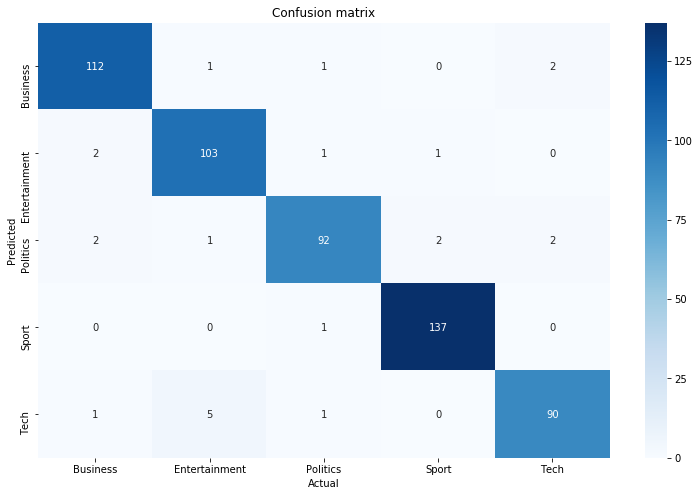

In [29]:
aux_df = data[['Category', 'Category_codes']].drop_duplicates().sort_values('Category_codes')
conf_matrix = confusion_matrix(labels_test, ypred)

plt.figure(figsize=(12.8,8))
ax = sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues", fmt = "g")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


We will create a dataframe with Model Name, Training Accuracy and Test Accuracy to compare later

In [12]:
models_summary = pd.DataFrame({"Model Name:" : ["Gradient Boosting Classifier"],
     "Training Accuracy" : [accuracy_score(labels_train, best_model.predict(features_train))],
     "Test Accuracy" : [accuracy_score(labels_test, ypred)]}, index = [1])

In [29]:
models_summary

,Model Name:,Training Accuracy,Test Accuracy
1,Gradient Boosting Classifier,1.0,0.958707


In [30]:
with open("Models//models_summary.pickle", "rb") as file:
    all_models_summary = pickle.load(file)
all_models_summary = all_models_summary.append(models_summary)
all_models_summary

,Model Name:,Training Accuracy,Test Accuracy
0,Random Forest Classifier,1.0,0.960503
1,Gradient Boosting Classifier,1.0,0.958707


In [17]:
with open("Models//best_gb.pickle", "wb") as output:
    pickle.dump(best_model, output)

In [31]:
with open("Models//models_summary.pickle", "wb") as output:
    pickle.dump(all_models_summary, output)

In [28]:
all_models_summary

,Model Name:,Training Accuracy,Test Accuracy
1,Gradient Boosting Classifier,1.0,0.958707
